<a href="https://colab.research.google.com/github/oliverZZ/193B_Glucose_Monitor/blob/master/Infection_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import pandas as pd
pd.options.display.max_rows = 20
import matplotlib.pyplot as plt
import numpy as np

bg = pd.read_excel('/content/drive/My Drive/EEC 193/EEC 193B/Burn_Glucose_022020.xlsx', skiprows = 0)

In [2]:
bg

,PER_CODE,Collection Date,Time Vitals,Systolic,Diastolic,MAP,HR,RR,Temp,CVP,GCS,Vent,Time_CBC,WBC,Hgb,Hct,Platelet,Time Labs,Na,K_pos,BUN,Creatnine,Glucose,Tbili,Chloride,V_CO2,PaO2,FIO2,PaCO2,HCO3,PH,Sepsis
0,21,2011-01-02,614.0,113.0,67.0,78.0,102.0,15.0,37.0,7.0,15.0,No,5.0,6.9,8.1,24.5,578.0,5.0,136.0,3.6,7.0,0.53,110.0,0.3,101.0,29.0,NaN,NaN,NaN,NaN,NaN,0
1,21,2011-01-03,600.0,137.0,67.0,85.0,105.0,16.0,37.3,7.0,15.0,No,59.0,7.8,7.9,25.1,615.0,59.0,137.0,3.7,8.0,0.55,130.0,0.3,104.0,27.0,NaN,NaN,NaN,NaN,NaN,0
2,21,2011-01-04,1000.0,124.0,56.0,73.0,104.0,18.0,37.5,7.0,15.0,No,208.0,8.9,8.7,26.6,607.0,208.0,135.0,3.4,8.0,0.53,172.0,0.3,103.0,24.0,NaN,NaN,NaN,NaN,NaN,0
3,21,2011-01-05,930.0,143.0,69.0,85.0,104.0,18.0,37.5,7.0,15.0,No,103.0,9.3,8.4,25.7,414.0,103.0,134.0,4.8,10.0,0.49,150.0,0.3,103.0,25.0,NaN,0.21,NaN,NaN,NaN,0
4,21,2011-01-06,1130.0,130.0,59.0,83.0,104.0,23.0,38.0,7.0,15.0,No,130.0,8.4,8.9,27.7,701.0,130.0,136.0,3.5,11.0,0.51,109.0,0.3,103.0,27.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,PCR-004-00018,2013-05-27,600.0,140.0,70.0,102.0,116.0,26.0,38.5,NaN,NaN,No,211.0,17.6,9.2,26.8,454.0,211.0,138.0,4.5,12.0,0.88,139.0,NaN,103.0,25.0,NaN,NaN,NaN,NaN,NaN,0
6537,PCR-004-00018,2013-05-28,600.0,158.0,53.0,82.0,110.0,22.0,37.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6538,PCR-004-00018,2013-05-29,600.0,133.0,51.0,72.0,120.0,22.0,38.5,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6539,PCR-004-00018,2013-05-30,600.0,118.0,49.0,73.0,118.0,22.0,38.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data Preprocessing ##

In [0]:
def Drop_nan_row(df):
  
  drop_idx = []
  for i in range(len(df)):
    nan_count = 0
    for x in df.loc[i]:
      if str(x) == 'nan':
        nan_count += 1
    if nan_count >= 15:
      drop_idx.append(i)
    
  modified_df = df.drop(df.index[drop_idx], errors = 'ignore')
  modified_df = modified_df.reset_index(drop = True)

  return modified_df

In [0]:
def Drop_unrelated_cols(df):
  df = df.drop(columns = ['PER_CODE', 'Collection Date', 'Time Vitals', 'Time Labs'], errors = 'ignore')
  return df

In [0]:
def Drop_nan_col(df):
  
  num_rows = len(df)
  for x in df:
    num_nan = 0
    for i in df[x]:
      if str(i) == 'nan':
        num_nan += 1
    
    if (num_nan/num_rows) >= 0.2:
      df = df.drop(columns = x, errors = 'ignore')
  
  return df

In [0]:
def Complete_dataset(df):

  # Change "Yes" and "No" under "Vent" to 1 and 0
  df = df.replace('No', 0)
  df = df.replace('Yes', 1)

  # drop nan or replace them with other value
  df = df.dropna()
  df = df.reset_index(drop = True)

  return df

In [0]:
def data_preprocess(df):

  # drop rows that have too many nan
  df = Drop_nan_row(df)
  # drop times and patient ids
  df = Drop_unrelated_cols(df)
  # drop cols that have too many nan
  df = Drop_nan_col(df)
  # Replace all the other nans
  df = Complete_dataset(df)

  return df

In [0]:
bg = data_preprocess(bg)

In [9]:
bg

,Systolic,Diastolic,MAP,HR,RR,Temp,GCS,Vent,Time_CBC,WBC,Hgb,Hct,Platelet,Na,K_pos,BUN,Creatnine,Glucose,Chloride,V_CO2,Sepsis
0,113.0,67.0,78.0,102.0,15.0,37.0,15.0,0.0,5.0,6.9,8.1,24.5,578.0,136.0,3.6,7.0,0.53,110.0,101.0,29.0,0
1,137.0,67.0,85.0,105.0,16.0,37.3,15.0,0.0,59.0,7.8,7.9,25.1,615.0,137.0,3.7,8.0,0.55,130.0,104.0,27.0,0
2,124.0,56.0,73.0,104.0,18.0,37.5,15.0,0.0,208.0,8.9,8.7,26.6,607.0,135.0,3.4,8.0,0.53,172.0,103.0,24.0,0
3,143.0,69.0,85.0,104.0,18.0,37.5,15.0,0.0,103.0,9.3,8.4,25.7,414.0,134.0,4.8,10.0,0.49,150.0,103.0,25.0,0
4,130.0,59.0,83.0,104.0,23.0,38.0,15.0,0.0,130.0,8.4,8.9,27.7,701.0,136.0,3.5,11.0,0.51,109.0,103.0,27.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5183,138.0,58.0,86.0,98.0,18.0,37.7,7.0,1.0,111.0,16.2,10.2,31.4,124.0,147.0,3.6,65.0,2.44,115.0,115.0,25.0,0
5184,123.0,63.0,82.0,77.0,15.0,37.9,15.0,0.0,2359.0,11.6,15.0,45.0,152.0,137.0,4.2,11.0,0.85,76.0,106.0,25.0,0
5185,134.0,57.0,76.0,115.0,16.0,38.1,15.0,0.0,220.0,5.7,13.5,40.4,96.0,137.0,3.8,10.0,0.55,252.0,105.0,28.0,0
5186,106.0,50.0,75.0,134.0,17.0,38.0,15.0,0.0,157.0,5.0,12.6,36.0,157.0,135.0,4.1,10.0,0.57,123.0,101.0,29.0,0


## Unsupervised Learning ##

In [10]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.2)


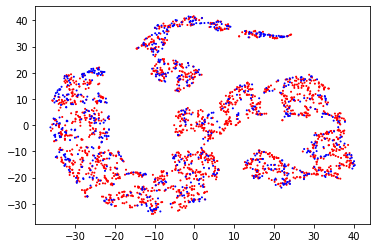

In [12]:
# from sklearn.manifold import TSNE
# import imblearn 
# import math

# #col = list(bg.columns)
# col = ['Hct', 'Platelet', 'WBC', 'Temp', 'RR', 'HR']
# train_y = bg.Sepsis.values
# #col.remove('Sepsis')
# model = TSNE(learning_rate=10)

# sampling_numbers = {0: math.ceil(len(train_y[train_y == 1]) * 2.5), 1: len(train_y[train_y == 1])}
# rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=sampling_numbers)
# train_x, train_y = rus.fit_resample(bg[col].values, train_y)

# transformed = model.fit_transform(train_x)

# x_axis = transformed[:, 0]
# y_axis = transformed[:, 1]

# color_set = {0:'red', 1:'blue'}
# color = []
# for i in train_y:
#   color.append(color_set[i])

# plt.scatter(x_axis, y_axis, s = 1, c = color)
# plt.show()

[[23.53597507  0.16473731]
 [34.73705333  0.09950522]]


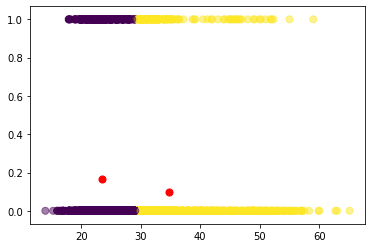

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(bg[['Hct','Sepsis']])

centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(bg['Hct'], bg['Sepsis'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)